<a href="https://colab.research.google.com/github/shonyeajin/KCBD/blob/main/%EC%BA%90%EC%B0%BD%EB%B0%B0%EB%94%A5_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels)= reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
  results=np.zeros((len(sequences),dimention))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [9]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [13]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.4757 - accuracy: 0.4836 - val_loss: 1.6663 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3529 - accuracy: 0.7130 - val_loss: 1.2788 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0070 - accuracy: 0.7801 - val_loss: 1.1197 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7994 - accuracy: 0.8252 - val_loss: 1.0233 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6329 - accuracy: 0.8668 - val_loss: 0.9929 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5121 - accuracy: 0.8934 - val_loss: 0.9347 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4158 - accuracy: 0.9138 - val_loss: 0.9213 - val_accuracy: 0.8130
Epoch 8/20
16

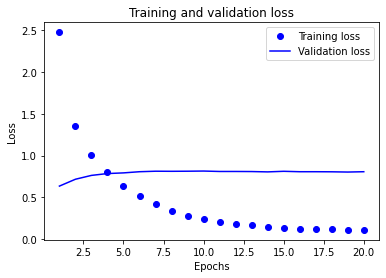

In [21]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_accuracy']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
history.history

{'accuracy': [0.4835880696773529,
  0.7129791975021362,
  0.7801302671432495,
  0.8252317905426025,
  0.8668253421783447,
  0.893385112285614,
  0.9138060808181763,
  0.9304685592651367,
  0.9372338056564331,
  0.9456276893615723,
  0.9493861198425293,
  0.9520170092582703,
  0.9543973803520203,
  0.9538962841033936,
  0.9559007883071899,
  0.9565271735191345,
  0.9561513662338257,
  0.9566524624824524,
  0.9591581225395203,
  0.9582811594009399],
 'loss': [2.475677728652954,
  1.3528556823730469,
  1.0069804191589355,
  0.7993929982185364,
  0.6328778862953186,
  0.5121081471443176,
  0.4158051311969757,
  0.3381786644458771,
  0.2777281403541565,
  0.2358199805021286,
  0.20583020150661469,
  0.17740418016910553,
  0.16559481620788574,
  0.14699745178222656,
  0.13826845586299896,
  0.1275610476732254,
  0.12260739505290985,
  0.11593590676784515,
  0.1140802875161171,
  0.11071429401636124],
 'val_accuracy': [0.6349999904632568,
  0.7170000076293945,
  0.7630000114440918,
  0.785000

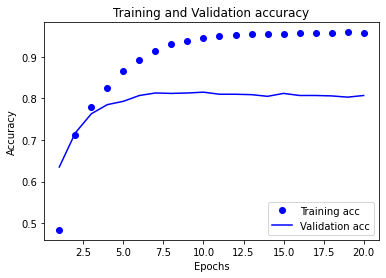

In [25]:
plt.clf()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9번째 epoch 부터 과대적합 시작됨

In [26]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results=model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 77ms/step - loss: 2.5088 - accuracy: 0.5061 - val_loss: 1.6942 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.3936 - accuracy: 0.7045 - val_loss: 1.3172 - val_accuracy: 0.6980
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0397 - accuracy: 0.7769 - val_loss: 1.1472 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 1s 48ms/step - loss: 0.8190 - accuracy: 0.8212 - val_loss: 1.0416 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6491 - accuracy: 0.8656 - val_loss: 0.9708 - val_accuracy: 0.7910
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5157 - accuracy: 0.8930 - val_loss: 0.9375 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4119 - accuracy: 0.9127 - val_loss: 0.9091 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [34]:
results

[0.9970802068710327, 0.7845057845115662]

In [29]:
predictions=model.predict(x_test)

In [33]:
predictions[0].shape #길이가 46인 벡터
np.sum(predictions[0]) #합이 1
np.argmax(predictions[0]) # 가장 확률이 높은 클래스가 예측 클래스

3